### 회귀 분석
- 원인(X)이 결과(Y)에 미치는 영향력을 수식으로 증명하는 과정이다.

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 생성
# 독립변수 : 광고비
# 10부터 100까지 10단위로 증가하는 배열 생성
ad_spend = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ad_spend

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [3]:
# 종속 변수 : 매출액
# 광고비가 1 오를 때 매출 2.5씩 오른다는 것을 가정한다.
# 광고를 하지 않아도 기본 매출 100은 나온다.
# np.random.normal(...) : 현실 세계의 예측 불가능한 변수들
sales = 2.5 * ad_spend + np.random.normal(0, 10, 10) + 100
sales

array([110.66224111, 150.22719475, 166.65452249, 204.32753693,
       234.40386893, 247.6504033 , 265.28312287, 307.18508909,
       331.53544366, 355.49321323])

In [4]:
# 모델 적합 (model fitting) : 가장 중요한 단계
# 선형 회귀를 수행때 만들어지는 예측선의 방정식 (혹은 값을 잘 예측할 수 있는 1차 방정식)에 들어가는 상수 값을
# 찾는 과정이다.

import statsmodels.api as sm

In [5]:
# 상수항 추가
# statsmodels는 기본적으로 '절편'을 계산하지 않고 원점(0, 0)을 지나는 선을 긋는다.
# 따라서 '기본 매출(Y절편)'을 구하기 위해서 반드시 1로 채워진 열하나를 추가해야 한다.
# 이 코드를 빼먹으면 모델 성능이 망가진다.
X = sm.add_constant(ad_spend)
X

array([[  1.,  10.],
       [  1.,  20.],
       [  1.,  30.],
       [  1.,  40.],
       [  1.,  50.],
       [  1.,  60.],
       [  1.,  70.],
       [  1.,  80.],
       [  1.,  90.],
       [  1., 100.]])

In [6]:
# OLS 모델 생성 및 학습
# OLS (Ordinary Least Squares) : 오차의 제곱 합을 최소화 하는 선을 찾는 방법(최소자승법)
# fit() : 데이터를 하급 시켜서 최적의 선(모델)을 완성하는 함수
model = sm.OLS(sales, X).fit()

In [7]:
# 예측값 생성
pred_y = model.predict(X)
pred_y

array([118.12219228, 144.61554147, 171.10889066, 197.60223985,
       224.09558904, 250.58893823, 277.08228742, 303.57563662,
       330.06898581, 356.562335  ])

In [8]:
# R-squared (결정 계수) : 모델의 점수 (0 ~ 1). 0.6 이상이면 보통 쓸만하다고 판단.
print(model.rsquared)
# 회귀 계수 : X가 1증가할 때 Y가 얼마나 변화하는가
print(model.params[1])
# p value
print(model.pvalues[1])

0.9927540558165098
2.64933491912063
7.559631990774557e-10


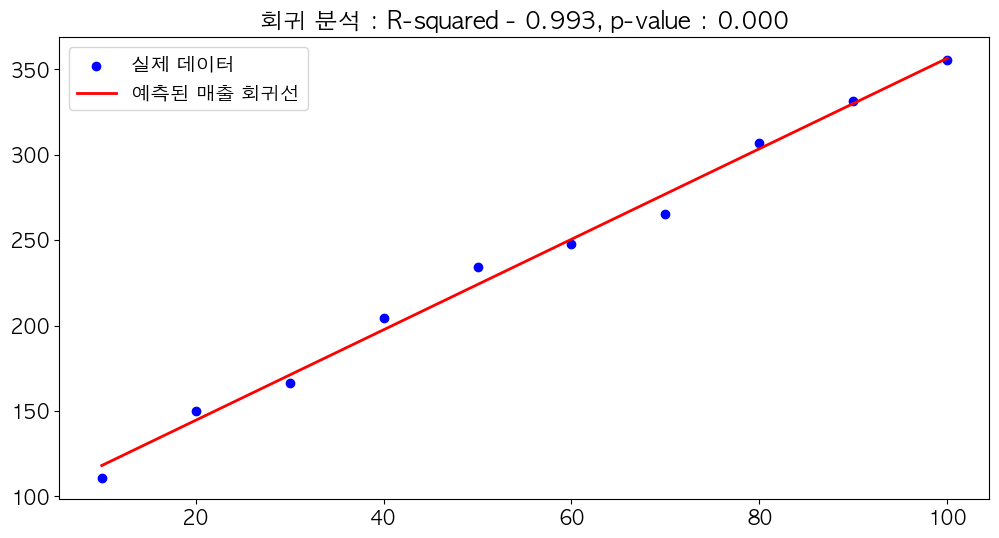

In [9]:
# 시각화

# 산점도 : 실제 데이터의 분포
plt.scatter(ad_spend, sales, color='blue', label='실제 데이터')

# 회귀선

plt.plot(ad_spend, pred_y, color='red', linewidth=2, label='예측된 매출 회귀선')

plt.title(f'회귀 분석 : R-squared - {model.rsquared:.3f}, p-value : {model.pvalues[1]:.3f}')

plt.legend()
plt.show()

- 회귀 분석의 결과 p value가 0.05보다 작은 0.000000000 이므로 '광고비가 달라지더라도 매출에는 영향을 미치지 않는다'는 귀무 가설을 기각한다.
- 따라서 '광고비의 증감은 매출의 증감에 영향을 미칠 수 있다.'
- 우리가 학습 시킨 모델의 결정 계수는 0.98을 보이고 있으므로 이 선형회귀 모델이 예측하는 결과는 약 +- 2% 정도의 오차를 보인다.
- 회귀 계수가 약 2.62 이므로 x가 1증가할 때 y는 2.62 정도 증가를 한다. 따라서 광고비의 증액은 매출의 증가를 가져올 수 있다.